<a href="https://colab.research.google.com/github/JunAbe0802/240223JC/blob/main/sinib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

解説文はすべてChatGPTより取得（そのため精確でない可能性あり）

### Installation

In [25]:
knitr::opts_chunk$set(warning = FALSE, message = FALSE, fig.align = "center")

install.packages("sinib")
install.packages("patchwork")

library(tidyverse)
library(sinib)
library(scales)
library(broom)
library(patchwork)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Data Preparation

In [26]:
# @title Read in the data, converting the names to cleaner forms and marking muators in the process.

df <- read_csv("targeted_with_imps.csv") %>%
  filter(is_standard == FALSE)

clean.names <- data.frame(line = unique(df$line)) %>%
  mutate(clean = case_when(
    grepl("ap", line) ~ str_replace(line, "ap", "A+"),
    grepl("am", line) ~ str_replace(line, "am", "A-"),
    grepl("rel", line) ~ str_replace(line, "rel60", "R0")
  ))

mut.lines <- c("A-1", "A-2", "A-3", "A-4", "A+3", "A+6")

df <- left_join(df, clean.names)

df

Rows: 16184 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): charge, line, phase, repl, compound
dbl (2): peak_area, n_peak_area
lgl (2): is_standard, was_imputed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(line)`


charge,line,phase,repl,compound,is_standard,was_imputed,peak_area,n_peak_area,clean
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>
negative,am1,e,r1,GTP,FALSE,FALSE,2.417238e+04,2.703490e-05,A-1
negative,am1,e,r1,CTP,FALSE,FALSE,1.944430e+04,2.174692e-05,A-1
negative,am1,e,r1,UTP,FALSE,FALSE,7.671284e+04,8.579726e-05,A-1
negative,am1,e,r1,Fructose-1 6-bisphosphate,FALSE,FALSE,2.436463e+05,2.724992e-04,A-1
negative,am1,e,r1,Thiamine pyrophosphate,FALSE,FALSE,8.653265e+04,9.677994e-05,A-1
negative,am1,e,r1,ATP,FALSE,FALSE,2.582235e+05,2.888026e-04,A-1
negative,am1,e,r1,Glutathione disulfide,FALSE,FALSE,8.897590e+05,9.951252e-04,A-1
negative,am1,e,r1,Lysine,FALSE,FALSE,2.139848e+05,2.393252e-04,A-1
negative,am1,e,r1,NADP+,FALSE,FALSE,2.415862e+05,2.701951e-04,A-1


このRプログラムは、データフレーム `targeted_with_imps.csv` を読み込み、いくつかの操作を行っています。

1. `read_csv()` 関数を使用して、"targeted_with_imps.csv" ファイルからデータを読み込みます。
2. `filter()` 関数を使用して、`is_standard` 列が FALSE の行のみを保持します。
3. `unique(df$line)` を使って、`df` データフレーム内の `line` 列のユニークな値を取得し、それらを `data.frame()` 関数を使ってデータフレーム化します。
4. `mutate()` 関数を使って、`clean` 列を作成します。`line` 列の各要素に対して、`grepl()` 関数を使用して特定のパターンがマッチするかどうかを確認し、それに応じて新しい値を設定します。たとえば、"ap" が含まれる場合は "A+" に置き換えます。
5. `left_join()` 関数を使用して、元のデータフレーム `df` と新しく作成した `clean.names` データフレームを左結合します。これにより、`df` の各行に `clean` 列が追加されます。

つまり、このプログラムは、データの読み込みとフィルタリングを行い、`line` 列の特定のパターンに基づいて新しい列 `clean` を作成し、それを元のデータフレームに追加します。

In [27]:
# @title Get fold changes from ancestor to each evolved lin

# these are the ancestral mean peak areas
anc.vals <- df %>%
  mutate(age = ifelse(grepl("R0", clean), "Ancestor", "Evolved")) %>%
  filter(age == "Ancestor") %>%
  group_by(charge, phase, compound) %>%
  summarise(anc_mean = mean(n_peak_area)) %>%
  ungroup()

# these are the evo mean peak areas
evo.vals <- df %>%
  mutate(age = ifelse(grepl("R0", clean), "Ancestor", "Evolved")) %>%
  filter(age != "Ancestor") %>%
  group_by(charge, phase, compound, clean) %>%
  summarise(evo_mean = mean(n_peak_area)) %>%
  ungroup()

# combine them and calculate fold changes
fc.df <- left_join(evo.vals, anc.vals) %>%
  mutate(l2ratio = log2(evo_mean / anc_mean),
         sig = abs(l2ratio) >= 1) %>%
  select(charge, phase, compound, clean, l2ratio, sig) %>%
  unite("cc", charge, compound)


fc.df

`summarise()` has grouped output by 'charge', 'phase'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'charge', 'phase', 'compound'. You can
override using the `.groups` argument.
Joining with `by = join_by(charge, phase, compound)`


cc,phase,clean,l2ratio,sig
<chr>,<chr>,<chr>,<dbl>,<lgl>
negative_1-Methyladenosine,e,A+1,0.12566774,FALSE
negative_1-Methyladenosine,e,A+2,-1.00481555,TRUE
negative_1-Methyladenosine,e,A+3,0.13293423,FALSE
negative_1-Methyladenosine,e,A+4,-0.21720265,FALSE
negative_1-Methyladenosine,e,A+5,-0.97165632,FALSE
negative_1-Methyladenosine,e,A+6,-0.28049286,FALSE
negative_1-Methyladenosine,e,A-1,-0.10976532,FALSE
negative_1-Methyladenosine,e,A-2,-0.54889320,FALSE
negative_1-Methyladenosine,e,A-3,-1.06190143,TRUE


このRプログラムは、与えられたデータフレーム `df` を使用していくつかの操作を行います。具体的には以下の処理を行っています。

1. `anc.vals` という名前のオブジェクトを作成しています。これは、次の操作を行った結果です。
   - `mutate()` 関数を使用して、`age` 列を作成します。`clean` 列が "R0" を含む場合は "Ancestor"、それ以外の場合は "Evolved" に設定します。
   - `filter()` 関数を使用して、`age` 列が "Ancestor" の行のみを保持します。
   - `group_by()` 関数を使用して、`charge` 列、`phase` 列、`compound` 列でグループ化します。
   - `summarise()` 関数を使用して、各グループ内の `n_peak_area` 列の平均値を計算します。
   - `ungroup()` 関数を使用して、グループ化を解除します。

2. `evo.vals` という名前のオブジェクトを作成しています。これは、次の操作を行った結果です。
   - `mutate()` 関数を使用して、`age` 列を作成します。`clean` 列が "R0" を含む場合は "Ancestor"、それ以外の場合は "Evolved" に設定します。
   - `filter()` 関数を使用して、`age` 列が "Ancestor" でない行のみを保持します。
   - `group_by()` 関数を使用して、`charge` 列、`phase` 列、`compound` 列、`clean` 列でグループ化します。
   - `summarise()` 関数を使用して、各グループ内の `n_peak_area` 列の平均値を計算します。
   - `ungroup()` 関数を使用して、グループ化を解除します。

3. `left_join()` 関数を使用して、`evo.vals` と `anc.vals` を左結合し、`fc.df` を作成します。
   - `mutate()` 関数を使用して、`l2ratio` 列を作成します。これは `evo_mean` 列を `anc_mean` 列で除算し、その結果に対数（底が2）を取ったものです。
   - `mutate()` 関数を使用して、`sig` 列を作成します。これは `l2ratio` の絶対値が1以上の場合に真となります。
   - `select()` 関数を使用して、必要な列のみを選択します。
   - `unite()` 関数を使用して、`charge` 列と `compound` 列を結合します。

つまり、このプログラムは、与えられたデータフレームを使用して、異なる条件に基づいてグループ化、平均化、および計算を行い、最終的に新しいデータフレーム `fc.df` を作成します。

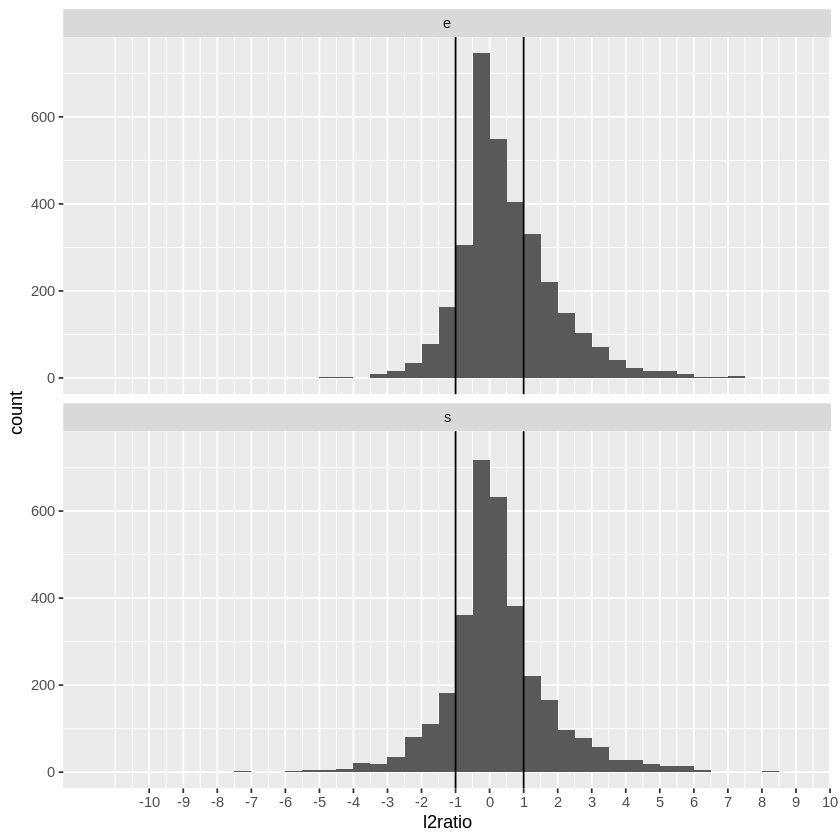

In [28]:
# @title fc distributions

ggplot(fc.df, aes(l2ratio))+
  geom_histogram(binwidth = .5, boundary = 0)+
  geom_vline(aes(xintercept = -1))+
  geom_vline(aes(xintercept = 1))+
  scale_x_continuous(breaks = seq(-10,10,1))+
  facet_wrap(~phase, ncol = 1)

In [29]:
# @title how many metabolite features (charge + compound) are there?

total.metabs <- length(unique(fc.df$cc))

total.metabs

[1] 275

### Theoretical distributions


In [30]:
# @title `prob.sig` is the line/phase specific probability of being a metab with abs(l2fc) >= 1 given a total number of features (charge + compound).

sig.probs <- fc.df %>%
  mutate(direc = ifelse(l2ratio > 0, "Up", "Down")) %>%
  filter(sig == TRUE) %>%
  group_by(clean, phase, direc) %>%
  tally() %>%
  ungroup() %>%
  mutate(prob.sig = n / total.metabs) %>%
  group_by()

sig.probs

clean,phase,direc,n,prob.sig
<chr>,<chr>,<chr>,<int>,<dbl>
A+1,e,Down,14,0.05090909
A+1,e,Up,92,0.33454545
A+1,s,Down,36,0.13090909
A+1,s,Up,33,0.12000000
A+2,e,Down,17,0.06181818
A+2,e,Up,71,0.25818182
A+2,s,Down,27,0.09818182
A+2,s,Up,62,0.22545455
A+3,e,Down,36,0.13090909


このRプログラムは、与えられたデータフレーム `fc.df` に対していくつかの操作を行い、特定の条件に基づいて統計情報を計算しています。

1. `mutate()` 関数を使って、`l2ratio` 列の値が0より大きい場合は "Up"、それ以外の場合は "Down" という新しい列 `direc` を作成します。
2. `filter()` 関数を使って、`sig` 列の値が TRUE（真）である行のみを選択します。
3. `group_by()` 関数を使って、`clean` 列、`phase` 列、`direc` 列に基づいてグループ化を行います。
4. `tally()` 関数を使って、各グループ内の行数を数えます。
5. `ungroup()` 関数を使って、グループ化を解除します。
6. `mutate()` 関数を使って、新しい列 `prob.sig` を作成します。これは、各グループ内の `n` の値を、`total.metabs` という変数で割ったものです。
7. 最後に、再度 `group_by()` 関数を使って、何も指定せずにグループ化を解除します。

そして、`sig.probs` という名前のオブジェクトに結果を保存し、それを出力します。

つまり、このプログラムは、特定の条件に基づいてデータをフィルタリングし、グループ化してから統計情報を計算し、その結果を `sig.probs` という名前のオブジェクトに格納しています。

In [31]:
# @title Get the theoretical distributions and use that to figure out how many features you'd expect to see altered in the same direction (`shared_metabs`) in `n_lines`.

sinib.probs <- sig.probs %>%
  split(list(.$phase, .$direc)) %>% # for each phase and direction
  map(function(x){
    # what is the prob of picking a metab that is sig in n lines
    dsinib(x = 1:12, # chance of getting 1, 2, ... successes, i.e. same metab same direc in n lines
           size = rep(1, 12), # pick one metab, 12 times, one for each of the 1:12 above
           prob = x$prob.sig) %>% # probs from the data
      as_tibble() %>% # convert to df
      mutate(n_lines = 1:12) # add n lines values to match the probs
  }) %>%
  bind_rows(.id = "sample") %>%
  separate(sample, into = c("phase", "direc"), sep = "\\.") %>%
  mutate(type = "theoretical") %>%
  rename("probs" = "value") %>%
  mutate(shared_metabs = floor(total.metabs * probs)) # given these probs, how many metabs should be sig in n lines?

sinib.probs

phase,direc,probs,n_lines,type,shared_metabs
<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>
e,Down,3.899596e-01,1,theoretical,107
e,Down,2.207353e-01,2,theoretical,60
e,Down,7.154179e-02,3,theoretical,19
e,Down,1.489383e-02,4,theoretical,4
e,Down,2.107024e-03,5,theoretical,0
e,Down,2.084489e-04,6,theoretical,0
e,Down,1.457490e-05,7,theoretical,0
e,Down,7.166664e-07,8,theoretical,0
e,Down,2.421831e-08,9,theoretical,0


このRプログラムは、与えられた統計情報を使用して、シミュレーションを行い、ある特定の条件の下での期待される結果を計算しています。

1. `split()` 関数を使って、`sig.probs` データフレームを `phase` 列と `direc` 列に基づいてグループ化します。

2. `map()` 関数を使って、各グループに対して関数を適用します。この関数は、指定された条件の下での確率を計算します。具体的には、`dsinib()` 関数を使用して、特定の条件下での確率を計算します。`x` パラメータには、1から12までの成功の数を指定し、`size` パラメータには1から12までの各行での試行回数を指定し、`prob` パラメータにはデータから取得した確率を指定します。そして、それをデータフレームに変換し、`n_lines` 列を追加します。

3. `bind_rows()` 関数を使用して、各グループの結果を1つのデータフレームに結合します。`sample` 列を `.id` パラメータで追加し、それを `"phase"` と `"direc"` に分割します。

4. `mutate()` 関数を使用して、新しい列 `type` を追加し、それを `"theoretical"` に設定します。また、`value` 列を `probs` にリネームします。

5. `mutate()` 関数を使用して、`total.metabs` と `probs` の積を計算し、`shared_metabs` 列に格納します。これは、各条件の下での期待される共有される代謝物の数を示します。

最後に、`sinib.probs` データフレームを出力します。これは、シミュレーションに基づいて計算された特定条件下での期待される結果を含んでいます。

In [32]:
# @title Get the actual number distributions my multiplying `n_lines` by the `shared_metabs` in a phase and direction specific manner.
theory.dist <- sinib.probs %>%
  split(list(.$phase, .$direc)) %>%
  map(function(x){
    rep(
      x$n_lines,
      x$shared_metabs
    )
  })

theory.dist

$e.Down
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[186] 3 4 4 4 4

$s.Down
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4
[223] 4 4 4 4 5 5 5 5

$e.Up
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[149] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[186] 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[223] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[260] 6 7 7 7 7 7 7 8

$s.Up
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[186] 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[223] 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 7

このRプログラムは、`sinib.probs` データフレームを使用して、各相と方向の組み合わせに対する理論的な確率分布を計算しています。

具体的には、次の手順を実行しています：

1. `split()` 関数を使用して、`phase` 列と `direc` 列に基づいて `sinib.probs` データフレームをグループ化します。
2. `map()` 関数を使用して、各グループに対して以下の操作を実行します：
   - `rep()` 関数を使用して、`n_lines` 列の値を `shared_metabs` 列の値回だけ繰り返します。これにより、各ラインで共有される代謝物の数に対応する確率分布が作成されます。

これにより、`sinib.probs` データフレームに基づいて、各相と方向の組み合わせに対する理論的な確率分布が計算され、`theory.dist` というオブジェクトに格納されます。

### Observed


In [33]:
# @title Observed probability of being shared, add a 1-sum here

obs.probs <- fc.df %>%
  filter(sig == TRUE) %>%
  mutate(direc = ifelse(l2ratio > 0, "Up", "Down")) %>%
  group_by(cc, direc, phase) %>%
  tally() %>%
  ungroup() %>%
  group_by(direc, phase, n) %>%
  tally() %>%
  ungroup() %>%
  mutate(probs = nn / total.metabs,
         type = "Observed") %>%
  select(direc, phase, n, probs, type) %>%
  rename("n_lines" = "n")

obs.probs

# make a matching df of theoretical probs
th.probs <- sinib.probs %>%
  select(phase, direc, n_lines, probs) %>%
  mutate(type = "Theoretical")

th.probs

Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.


direc,phase,n_lines,probs,type
<chr>,<chr>,<int>,<dbl>,<chr>
Down,e,1,0.196363636,Observed
Down,e,2,0.120000000,Observed
Down,e,3,0.058181818,Observed
Down,e,4,0.029090909,Observed
Down,e,5,0.018181818,Observed
Down,e,6,0.007272727,Observed
Down,e,7,0.010909091,Observed
Down,e,8,0.003636364,Observed
Down,e,9,0.003636364,Observed


phase,direc,n_lines,probs,type
<chr>,<chr>,<int>,<dbl>,<chr>
e,Down,1,3.899596e-01,Theoretical
e,Down,2,2.207353e-01,Theoretical
e,Down,3,7.154179e-02,Theoretical
e,Down,4,1.489383e-02,Theoretical
e,Down,5,2.107024e-03,Theoretical
e,Down,6,2.084489e-04,Theoretical
e,Down,7,1.457490e-05,Theoretical
e,Down,8,7.166664e-07,Theoretical
e,Down,9,2.421831e-08,Theoretical


このRプログラムは、実際のデータ（観測された頻度）と理論的なデータ（理論的な確率分布）のデータフレームを作成します。

1. `fc.df` データフレームから、`sig` 列が TRUE（真）である行のみを抽出します。
2. `mutate()` 関数を使用して、`l2ratio` 列の値が0より大きい場合は "Up"、それ以外の場合は "Down" という新しい列 `direc` を作成します。
3. `group_by()` 関数を使用して、`cc` 列、`direc` 列、`phase` 列に基づいてグループ化します。
4. `tally()` 関数を使用して、各グループ内の行数を数えます。
5. `ungroup()` 関数を使用して、グループ化を解除します。
6. `group_by()` 関数を使用して、`direc` 列、`phase` 列、`n` 列に基づいてグループ化します。
7. 再度 `tally()` 関数を使用して、各グループ内の行数を数えます。
8. `ungroup()` 関数を使用して、グループ化を解除します。
9. `mutate()` 関数を使用して、各行の割合を計算し、新しい列 `probs` に格納します。
10. `select()` 関数を使用して、`direc` 列、`phase` 列、`n` 列、`probs` 列、`type` 列を選択します。
11. `rename()` 関数を使用して、`n` 列の名前を `n_lines` に変更します。`obs.probs` という名前のデータフレームを作成します。

これにより、実際の観測されたデータに関する情報が含まれる `obs.probs` データフレームが作成されます。

次に、

1. `sinib.probs` データフレームから、`phase` 列、`direc` 列、`n_lines` 列、`probs` 列を選択します。
2. `mutate()` 関数を使用して、新しい列 `type` を作成し、その値を "Theoretical" に設定します。
3. `th.probs` という名前のデータフレームを作成します。

これにより、理論的な確率分布に関する情報が含まれる `th.probs` データフレームが作成されます。

In [34]:
# @title How many features are actually shared?

actual.dist <- fc.df %>%
  filter(sig == TRUE) %>%
  mutate(direc = ifelse(l2ratio > 0, "Up", "Down")) %>%
  group_by(cc, direc, phase) %>%
  tally() %>%
  ungroup() %>%
  split(list(.$phase, .$direc)) %>%
  map(function(x){
    pull(x, n) %>%
      sort()
  })

actual.dist

$e.Down
  [1]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [26]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [51]  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 [76]  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3
[101]  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  6  6  7  7  7  8  9 10 10
[126] 12

$s.Down
  [1]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [26]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [51]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [76]  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
[101]  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
[126]  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
[151]  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  7  7  8  8  8  8  8  9  9  9
[176]  9 10

$e.Up
  [1]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [26]  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3
 [51]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4
 [76]  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
[101]  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  7
[126]  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9
[151]  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10
[176] 10 10 10 11 11 12 12 12 12 12

$s.Up
  [1]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [26]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [51]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3
 [76]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4
[101]  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
[126]  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6
[151]  6  6  6  6  6  6  6  6  6  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8
[176]  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10

このRプログラムは、`fc.df`データフレームから実際の分布を計算しています。

具体的には、次の手順を実行しています：

1. `filter()`関数を使用して、`sig`列がTRUE（真）である行のみを抽出します。
2. `mutate()`関数を使用して、`l2ratio`列の値が0より大きい場合は "Up"、それ以外の場合は "Down" という新しい列 `direc` を作成します。
3. `group_by()`関数を使用して、`cc`列、`direc`列、`phase`列に基づいてグループ化します。
4. `tally()`関数を使用して、各グループ内の行数を数えます。
5. `ungroup()`関数を使用して、グループ化を解除します。
6. `split()`関数を使用して、`phase`列と`direc`列に基づいてデータフレームをグループ化します。
7. `map()`関数を使用して、各グループに対して以下の操作を実行します：
   - `pull()`関数を使用して、`n`列を抽出します。
   - `sort()`関数を使用して、`n`列の値を昇順に並べ替えます。

これにより、`fc.df`データフレームから実際の分布が計算され、その結果が `actual.dist`というオブジェクトに格納されます。

In [35]:
# @title Run t-test to compare theoretical and observed

t.res <- sapply(names(theory.dist), function(x) {
  t.test(theory.dist[[x]],
         actual.dist[[x]]) %>%
    tidy()
}, simplify = FALSE) %>%
  bind_rows(.id = "sample") %>%
  separate(sample, into = c("phase", "direc"), sep = "\\.") %>%
  mutate(xpos = 6.5, # these are for positioning them on a graph
         ypos = 60,
         p.value = paste("p =", signif(p.value, 1))) %>%
  mutate(phase = ifelse(phase == "e", "Exponential", "Stationary"),
         type = "Observed")

t.res

phase,direc,estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative,xpos,ypos,type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Exponential,Down,-0.8575606,1.578947,2.436508,-4.428896,p = 2e-05,147.0850,-1.240214,-0.4749073,Welch Two Sample t-test,two.sided,6.5,60,Observed
Stationary,Down,-0.6718742,2.017391,2.689266,-3.742700,p = 2e-04,231.1154,-1.025571,-0.3181773,Welch Two Sample t-test,two.sided,6.5,60,Observed
Exponential,Up,-1.7154975,3.614232,5.329730,-6.795997,p = 9e-11,235.8750,-2.212798,-1.2181969,Welch Two Sample t-test,two.sided,6.5,60,Observed
Stationary,Up,-1.0559073,2.771318,3.827225,-5.115195,p = 6e-07,258.0959,-1.462400,-0.6494144,Welch Two Sample t-test,two.sided,6.5,60,Observed


このRプログラムは、理論的な分布と実際の分布の間でt検定を実行し、その結果を整理しています。

具体的には、次の手順を実行しています：

1. `sapply()` 関数を使用して、`theory.dist` の各要素に対して以下の操作を実行します：
   - `t.test()` 関数を使用して、対応する理論的な分布と実際の分布の間でt検定を行います。
   - `tidy()` 関数を使用して、結果を整理し、統計情報をデータフレームとして取得します。
2. `bind_rows()` 関数を使用して、各検定の結果を一つのデータフレームに結合します。`.id = "sample"` オプションは、元のデータフレームの名前を `sample` 列に追加します。
3. `separate()` 関数を使用して、`sample` 列を `phase` 列と `direc` 列に分割します。
4. `mutate()` 関数を使用して、検定結果の位置情報（`xpos`と`ypos`）とp値の表記を調整します。これは、グラフ上での要素の位置調整とp値の表示に役立ちます。
5. `mutate()` 関数を使用して、`phase` 列の値が "e" の場合は "Exponential" に、それ以外の場合は "Stationary" に置き換えます。
6. `mutate()` 関数を使用して、新しい列 `type` を追加し、その値を "Observed" に設定します。

これにより、各理論的な分布に対する実際の分布とのt検定結果が計算され、整理されたデータフレームが `t.res` に格納されます。

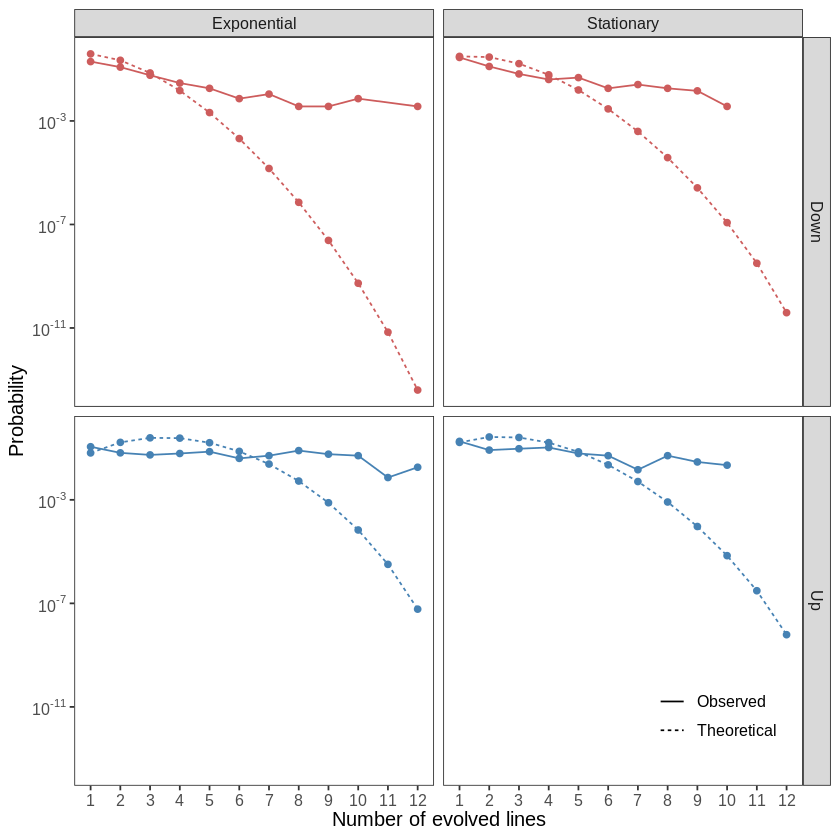

In [36]:
# @title Make a graph of the probabilities

pdf <- bind_rows(th.probs, obs.probs) %>%
  mutate(phase = ifelse(phase == "e", "Exponential", "Stationary"))

p.lines <- pdf %>%
  ggplot(., aes(n_lines, probs, color = direc, linetype = type)) +
  geom_line() +
  geom_point() +
  facet_grid(direc ~ phase) +
  scale_x_continuous(breaks = 0:12) +
  theme_bw() +
  theme(panel.grid = element_blank(),
        text = element_text(size = 12),
        legend.position = c(.88, .1),
        legend.background = element_blank()) +
  scale_color_manual(
    values = c("indianred", "steelblue"),
    name = NULL,
    guide = "none"
  ) +
  labs(x = "Number of evolved lines",
       y = "Probability") +
  scale_linetype_discrete(name = NULL) +
  scale_y_log10(labels = trans_format("log10", math_format(10 ^ .x)))

p.lines

このRプログラムは、理論的な確率分布と実際の観測された確率分布を含むデータフレームを結合し、それらの確率分布を可視化しています。

具体的には、次の手順を実行しています：

1. `bind_rows()` 関数を使用して、`th.probs`（理論的な確率分布）と `obs.probs`（実際の観測された確率分布）のデータフレームを結合します。
2. `mutate()` 関数を使用して、`phase` 列の値が "e" の場合は "Exponential" に、それ以外の場合は "Stationary" に置き換えます。
3. `ggplot()` 関数を使用して、データフレームを元にグラフを描画します。以下の設定が行われています：
   - `aes()` 関数を使用して、x軸に `n_lines`、y軸に `probs` を設定し、`direc` 列で色分けし、`type` 列で線の種類を分けます。
   - `geom_line()` 関数を使用して、折れ線グラフを描画します。
   - `geom_point()` 関数を使用して、データポイントを描画します。
   - `facet_grid()` 関数を使用して、グリッド状にサブプロットを作成します。
   - `scale_x_continuous()` 関数を使用して、x軸のラベルを設定します。
   - `theme_bw()` 関数を使用して、白黒のテーマを適用します。
   - `theme()` 関数を使用して、グラフのテーマを設定します。
   - `scale_color_manual()` 関数を使用して、色の手動スケールを設定します。
   - `labs()` 関数を使用して、軸ラベルを設定します。
   - `scale_linetype_discrete()` 関数を使用して、線の種類の手動スケールを設定します。
   - `scale_y_log10()` 関数を使用して、y軸の対数スケールを設定します。

これにより、理論的な確率分布と観測された確率分布のグラフが作成され、`p.lines` に格納されます。

### Number of metabs altered


In [37]:
# @title How many metabs did we expect to and actually see altered in the same direction?

t.metabs <- sinib.probs %>%
  select(phase, direc, n_lines, shared_metabs)

o.metabs <- fc.df %>%
  filter(sig == TRUE) %>%
  mutate(direc = ifelse(l2ratio > 0, "Up", "Down")) %>%
  group_by(cc, direc, phase) %>%
  tally(name = "n_lines") %>%
  ungroup() %>%
  group_by(direc, phase, n_lines) %>%
  tally(name = "shared_metabs") %>%
  ungroup()

plot.df <- bind_rows("Theoretical" = t.metabs, "Observed" = o.metabs, .id = "type") %>%
  mutate(phase = ifelse(phase == "e", "Exponential", "Stationary"))

このRプログラムは、理論的なデータと実際のデータから必要な情報を抽出し、それらを1つのデータフレームに結合して可視化のための準備を行っています。

具体的には、次の手順を実行しています：

1. `sinib.probs` データフレームから、`phase`、`direc`、`n_lines`、`shared_metabs` 列を選択して `t.metabs` データフレームを作成します。これは、理論的なデータから必要な情報を取得しています。
2. `fc.df` データフレームから、`sig` 列が TRUE である行のみを抽出し、`l2ratio` 列の値に応じて `direc` 列を設定します。そして、`cc`、`direc`、`phase` 列に基づいてグループ化し、各グループ内の行数をカウントします。これらの情報を `o.metabs` データフレームとして取得します。これは、実際の観測データから必要な情報を取得しています。
3. `bind_rows()` 関数を使用して、`t.metabs` データフレームと `o.metabs` データフレームを結合し、`Theoretical` および `Observed` という列を持つ `plot.df` データフレームを作成します。
4. `mutate()` 関数を使用して、`phase` 列の値が "e" の場合は "Exponential" に、それ以外の場合は "Stationary" に置き換えます。

これにより、理論的なデータと実際のデータが結合された `plot.df` データフレームが作成され、可視化の準備が整います。

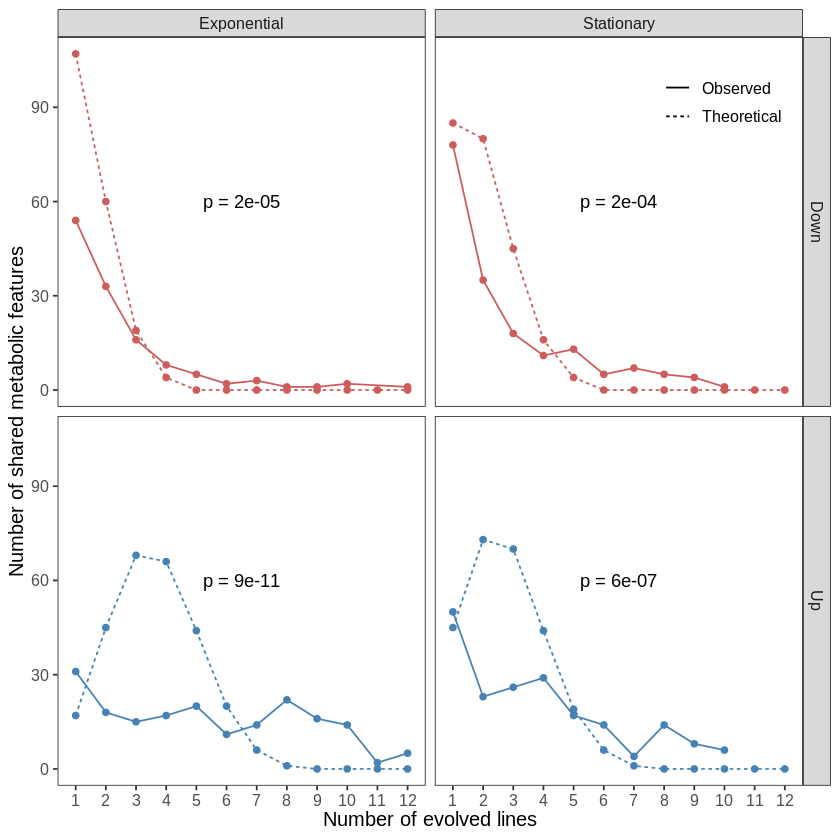

In [38]:
# @title As lines

p.lines2 <- plot.df %>%
  ggplot(., aes(
    factor(n_lines),
    shared_metabs,
    group = type,
    color = direc,
    linetype = type
  )) +
  geom_point()+
  geom_line()+
  facet_grid(direc ~ phase) +
  theme_bw() +
  theme(
    panel.grid = element_blank(),
    text = element_text(size = 12),
    legend.position = c(.89, .92),
    legend.background = element_blank()
  ) +
  scale_color_manual(
    values = c("indianred", "steelblue"),
    name = NULL,
    guide = "none"
  ) +
  scale_linetype_discrete(name = NULL)+
  labs(x = "Number of evolved lines",
       y = "Number of shared metabolic features")+
  geom_text(
    inherit.aes = FALSE,
    data = t.res,
    aes(
      x = xpos,
      y = ypos,
      label = p.value
    ),
    show.legend = FALSE
  )

p.lines2

このRプログラムは、`plot.df` データフレームに基づいて散布図と折れ線グラフを作成し、グラフに様々な要素を追加しています。

具体的には、次の手順を実行しています：

1. `plot.df` データフレームを使用して、散布図と折れ線グラフを描画します。`ggplot()` 関数を使用し、`aes()` 関数で各列を対応する要素にマッピングします。
2. `geom_point()` 関数を使用して、各点をプロットします。
3. `geom_line()` 関数を使用して、各グループのデータに対して折れ線を描画します。
4. `facet_grid()` 関数を使用して、グラフを `direc` 列と `phase` 列でグリッド状に分割します。
5. `theme_bw()` を使用して、白黒のテーマを適用します。
6. `theme()` 関数を使用して、パネルのグリッド、テキストのサイズ、凡例の位置などの表示をカスタマイズします。
7. `scale_color_manual()` 関数を使用して、線の色を指定します。
8. `scale_linetype_discrete()` 関数を使用して、線の種類（実線、点線）を指定します。
9. `labs()` 関数を使用して、x軸とy軸のラベルを設定します。
10. `geom_text()` 関数を使用して、t検定の結果であるp値をグラフ上にテキストとして表示します。テキストの位置は `xpos` と `ypos` 列に基づいて設定されます。

これにより、要素が追加された散布図と折れ線グラフが作成され、`p.lines2` オブジェクトに格納されます。